# Úkol 3

Stáhni si data ze souboru Life-Expectancy-Data-Updated.csv, která udávají průměrnou dobu života v jednotlivých zemích světa.

Vyber data pro jeden konkrétní rok (např. pro rok 2015).

In [23]:
import pandas
import seaborn
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import numpy

data = pandas.read_csv("Life-Expectancy-Data-Updated.csv")
data = data[data["Year"] == 2015].reset_index(drop=True)
data.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,Russian Federation,Rest of Europe,2015,6.6,8.2,223.0000,8.06,97,97,26.2,...,97,0.08,9313,144.10,2.3,2.3,12.0,0,1,71.2
3,Cameroon,Africa,2015,57.0,88.0,340.1265,4.55,84,64,24.3,...,84,1.12,1383,23.30,5.6,5.5,6.1,0,1,57.6
4,"Gambia, The",Africa,2015,39.7,59.8,261.7065,2.69,97,64,23.9,...,97,0.96,661,2.09,7.3,7.2,3.4,0,1,60.9


Vytvoř regresní model, jehož úkolem bude zjistit, které faktory ovlivňují průměrnou délku života.

Vysvětlovanou proměnnou ve tvém modelu bude Life expectancy, což je průměrná délka života. Délku dožití určitě bude ovlivňovat bohatství země, které lze vyjádřit ve hrubém domácím produktu na hlavu. Začni s modelem, který má jako vysvětlující proměnnou sloupec GDP_per_capita (hrubý domácí produkt na hlavu v dolarech).

Zobraz výsledek jako graf.

<AxesSubplot: xlabel='GDP_per_capita', ylabel='Life_expectancy'>

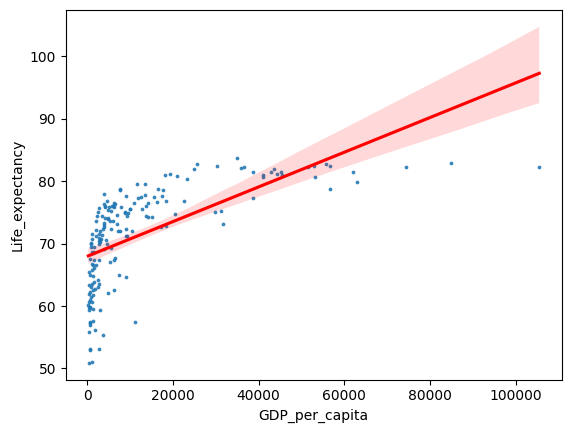

In [31]:
seaborn.regplot(data, x="GDP_per_capita", y="Life_expectancy", scatter_kws={"s": 3}, line_kws={"color":"r"})

Z grafu je vidět, že data příliš neodpovídají lineární funkci. Proto by bylo vhodné zkusit, zda by jejich transformace nepřinesla lepší výsledky. K tomu použijeme transformaci pomocí logaritmické funkce.

In [48]:
data["GDP_per_capita_log"] = numpy.log(data["GDP_per_capita"])
data[["Country", "GDP_per_capita", "GDP_per_capita_log", "Life_expectancy"]].head()

,Country,GDP_per_capita,GDP_per_capita_log,Life_expectancy
0,Turkiye,11006,9.306196,76.5
1,Spain,25742,10.155879,82.8
2,Russian Federation,9313,9.139167,71.2
3,Cameroon,1383,7.232010,57.6
4,"Gambia, The",661,6.493754,60.9


<AxesSubplot: xlabel='GDP_per_capita_log', ylabel='Life_expectancy'>

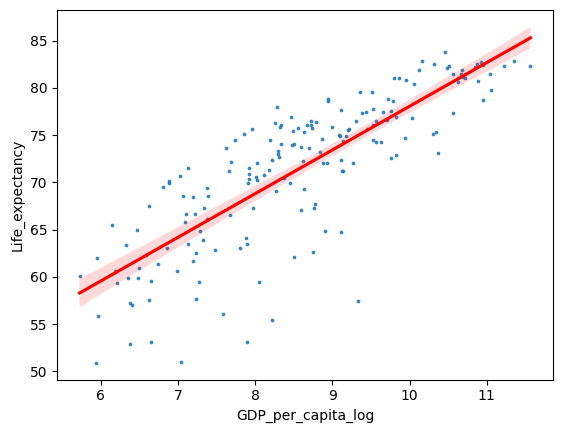

In [32]:
seaborn.regplot(data, x="GDP_per_capita_log", y="Life_expectancy", scatter_kws={"s": 3}, line_kws={"color":"r"})

Z výše uvedeného grafu vidíme, že takto ztransformovaná data mnohem více kopírují graf lineární funkce a tento model by měl tedy dávat přesnější výsledky.

Dále si zobraz tabulku s využitím metody využitím modulu scipy a metody summary() a zjisti koeficient determinace.

In [29]:
formula = "Life_expectancy ~ GDP_per_capita"
mod = smf.ols(formula, data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     116.1
Date:                Tue, 30 May 2023   Prob (F-statistic):           3.90e-21
Time:                        16:33:07   Log-Likelihood:                -576.78
No. Observations:                 179   AIC:                             1158.
Df Residuals:                     177   BIC:                             1164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         67.9538      0.561    121.219      0.000      66.848      69.060
GDP_per_capita     0.0003   2.58e-05     10.774      0.000       0.000       0.000
==============================================================================
Omnibus:                       18.171   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.349
Skew:                          -0.846   Prob(JB):                     2.31e-05
Kurtosis:                       3.037   Cond. No.                     2.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Koeficient determinace (R-squared) je 0,396, tzn. tento regresní model vysvětluje 39,6% rozptylu závislé (vysvětlované) proměnné.

In [39]:
formula = "Life_expectancy ~ GDP_per_capita_log"
mod = smf.ols(formula, data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     363.8
Date:                Tue, 30 May 2023   Prob (F-statistic):           8.66e-45
Time:                        18:06:46   Log-Likelihood:                -521.96
No. Observations:                 179   AIC:                             1048.
Df Residuals:                     177   BIC:                             1054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             31.8198      2.106     15.112      0.000      27.665      35.975
GDP_per_capita_log     4.6241      0.242     19.072      0.000       4.146       5.103
==============================================================================
Omnibus:                       37.717   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.324
Skew:                          -1.105   Prob(JB):                     7.96e-14
Kurtosis:                       4.789   Cond. No.                         55.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Při použití dat transformovaných pomocí logaritmické funkce vidíme, že koeficient determinace (R-squared) je 0,673, tzn. tento regresní model mnohem lépe vysvětluje rozptylu závislé proměnné oproti netransformovaným datům použitých v modelu výše.

Do modelu přidej následující sloupce:

Schooling - průměrná délka studia (v letech),
Incidents_HIV - nákazy virem HIV (počet případů na osobu),
Diphtheria - procento populace očkované proti záškrtu,
Polio - procento populace očkované proti dětské obrně,
BMI - průměrný BMI index populace,
Measles - procento populace očkované proti spalničkám.

In [40]:
formula = "Life_expectancy ~ GDP_per_capita + Schooling + Incidents_HIV + Diphtheria + Polio + BMI + Measles"
mod = smf.ols(formula, data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     92.03
Date:                Tue, 30 May 2023   Prob (F-statistic):           1.22e-54
Time:                        18:06:53   Log-Likelihood:                -482.13
No. Observations:                 179   AIC:                             980.3
Df Residuals:                     171   BIC:                             1006.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.9443      4.016      9.449      0.000      30.018      45.871
GDP_per_capita     0.0001   1.96e-05      5.565      0.000    7.05e-05       0.000
Schooling          0.8445      0.146      5.791      0.000       0.557       1.132
Incidents_HIV     -1.4128      0.173     -8.154      0.000      -1.755      -1.071
Diphtheria        -0.0035      0.051     -0.067      0.946      -0.105       0.098
Polio              0.1385      0.060      2.304      0.022       0.020       0.257
BMI                0.4254      0.161      2.646      0.009       0.108       0.743
Measles            0.0390      0.023      1.731      0.085      -0.005       0.083
==============================================================================
Omnibus:                        3.894   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                3.965
Skew:                          -0.347   Prob(JB):                        0.138
Kurtosis:                       2.774   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dalo by se předpokládat, že faktory průměrná délka studia a procento proočkovanosti proti záškrtu, obrně a spalničkám budou mít na délku života kladný vliv, zatímco počet lidí nakažených virem HIV a BMI budou délku života spíše snižovat.
Tento předpoklad se dle modelu naplnil u faktorů, jako jsou délka studia, počet případů HIV a proočkovanosti na obrnu a spalničky.
Zajímavé jsou v tomto ohledu výsledku u proočkovanosti na záškrt a BMI. Vysvětluji si to tak, že negativní vliv na délku života u proočkovanosti na záškrt může být způsoben malým či nedostatečným procentem proočkované populace. Kladný vliv BMI na délku života lze pak zřejmě interpretovat tím, že v chudších zemích, kde může obyvatelstvo trpět nedostatečnou výživou, má na délku života kladný vliv, pokud se u populace vyskytuje běžné BMI. Hodnota BMI lze totiž považovat za faktor s kladným vlivem na délku života pouze, pokud je standardním rozmezí - podvýživa i obezita totiž bývají spojovány s negativním vlivem na zdraví, a tedy mohou mít negativní vliv i na délku dožití.

Formuluj hypotézu o normalitě reziduí a otestuj ji s využitím modulu scipy a metody summary(). Jaký je výsledek - mají rezidua normální rozdělení?

H0: Rezidua mají normální rozdělení.

H1: Rezidua nemají normální rozdělení.

In [49]:
data["Residuals"] = res.resid
data["Predictions"] = res.fittedvalues
data[["Life_expectancy", "GDP_per_capita", "Schooling", "Incidents_HIV", "Diphtheria", "Polio", "BMI", "Measles", "Predictions", "Residuals"]].head()

,Life_expectancy,GDP_per_capita,Schooling,Incidents_HIV,Diphtheria,Polio,BMI,Measles,Predictions,Residuals
0,76.5,11006,7.8,0.08,97,97,27.8,65,73.087514,3.412486
1,82.8,25742,9.7,0.09,97,97,26.0,94,76.648487,6.151513
2,71.2,9313,12.0,0.08,97,97,26.2,97,77.016340,-5.816340
3,57.6,1383,6.1,1.12,84,77,24.3,64,64.903048,-7.303048
4,60.9,661,3.4,0.96,97,96,23.9,64,65.159867,-4.259867


In [42]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     92.03
Date:                Tue, 30 May 2023   Prob (F-statistic):           1.22e-54
Time:                        18:14:33   Log-Likelihood:                -482.13
No. Observations:                 179   AIC:                             980.3
Df Residuals:                     171   BIC:                             1006.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.9443      4.016      9.449      0.000      30.018      45.871
GDP_per_capita     0.0001   1.96e-05      5.565      0.000    7.05e-05       0.000
Schooling          0.8445      0.146      5.791      0.000       0.557       1.132
Incidents_HIV     -1.4128      0.173     -8.154      0.000      -1.755      -1.071
Diphtheria        -0.0035      0.051     -0.067      0.946      -0.105       0.098
Polio              0.1385      0.060      2.304      0.022       0.020       0.257
BMI                0.4254      0.161      2.646      0.009       0.108       0.743
Measles            0.0390      0.023      1.731      0.085      -0.005       0.083
==============================================================================
Omnibus:                        3.894   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                3.965
Skew:                          -0.347   Prob(JB):                        0.138
Kurtosis:                       2.774   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Vzhledem k tomu, že p-hodnota u testů normality - Omnibus testu (0,143) a Jarque-Bera testu (0,138), jsou obě větší než hladina významnosti, tj. 0.05, nezamítáme nulovou hypotézu, tj. tvrdíme, že data mají normální rozdělení.

<AxesSubplot: ylabel='Density'>

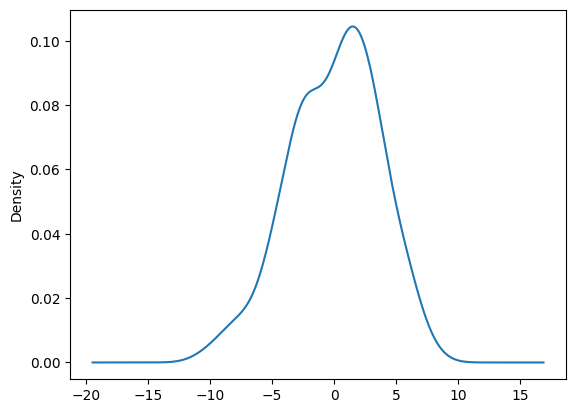

In [44]:
data["Residuals"].plot.kde()

Jaký je koeficient determinace výsledného modelu. Porovnej ho s koeficientem determinace, který vyšel z modelu, kde byl pouze hrubý domácí produkt. Jak se změnil? A co to znamená?

Koeficient determinace výsledného modelu je 0,790, což je výrazně výše než koeficient determinace původního modelu (0,396), který zohledňoval pouze vliv HDP na hlavu na délku života.

Pokud jsi nezamítl(a) hypotézu normality, podívej se do sloupce P>|t| a vyber řádek s nejvyšší p-hodnotou. Koeficient pro daný řádek odeber z modelu. Jak se změnila hodnota ostatních koeficientů? Jak se změnil koeficient determinace?

Řádek s nejvyšší p-hodnotou ve sloupci P>|t| je proočkovanost na záškrt (diphtheria). Po jeho odebrání vypadá model takto:

In [45]:
formula = "Life_expectancy ~ GDP_per_capita + Schooling + Incidents_HIV + Polio + BMI + Measles"
mod = smf.ols(formula, data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     108.0
Date:                Tue, 30 May 2023   Prob (F-statistic):           1.12e-55
Time:                        18:22:53   Log-Likelihood:                -482.14
No. Observations:                 179   AIC:                             978.3
Df Residuals:                     172   BIC:                             1001.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.9505      4.003      9.481      0.000      30.049      45.852
GDP_per_capita     0.0001   1.95e-05      5.594      0.000    7.06e-05       0.000
Schooling          0.8455      0.145      5.844      0.000       0.560       1.131
Incidents_HIV     -1.4129      0.173     -8.179      0.000      -1.754      -1.072
Polio              0.1349      0.026      5.106      0.000       0.083       0.187
BMI                0.4260      0.160      2.661      0.009       0.110       0.742
Measles            0.0389      0.022      1.737      0.084      -0.005       0.083
==============================================================================
Omnibus:                        3.921   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                3.993
Skew:                          -0.348   Prob(JB):                        0.136
Kurtosis:                       2.773   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Koeficient determinace zůstal stejný, tj. 0,790, přičemž hodnota ostatních koeficientů se změnila jen velmi mírně.